## Observations and Insights 

Three Observations

1. Overall, the Capomulin and Ramicane drug regimens were more successful at reducing tumor volume.
2. The number of female mice and male mice used in the study is almost equal.
3. The tumor volume and mouse weight are positvely correlated.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
combined_data=pd.merge(study_results, mouse_metadata, on ="Mouse ID", how="left")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data[combined_data["Mouse ID"] != "g989"]
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
combined_data["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regtum_df = combined_data.groupby(["Drug Regimen"])
tumor_mean = regtum_df["Tumor Volume (mm3)"].mean()
tumor_med = regtum_df["Tumor Volume (mm3)"].median()
tumor_var = regtum_df["Tumor Volume (mm3)"].var()
tumor_sd = regtum_df["Tumor Volume (mm3)"].std()
tumor_sem = regtum_df["Tumor Volume (mm3)"].sem()

reg_tum_summary = {"Tumor Volume Average": tumor_mean, 
                  "Tumor Volume Median": tumor_med,
                  "Tumor Volume Variance": tumor_var,
                  "Tumor Volume Std. Dev": tumor_sd,
                   "Tumor Volume SEM": tumor_sem}

drug_statsdf = pd.DataFrame(reg_tum_summary)

drug_statsdf

,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regtum_df = combined_data.groupby(["Drug Regimen"])
regtum_summ2 = regtum_df.agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
regtum_summ2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

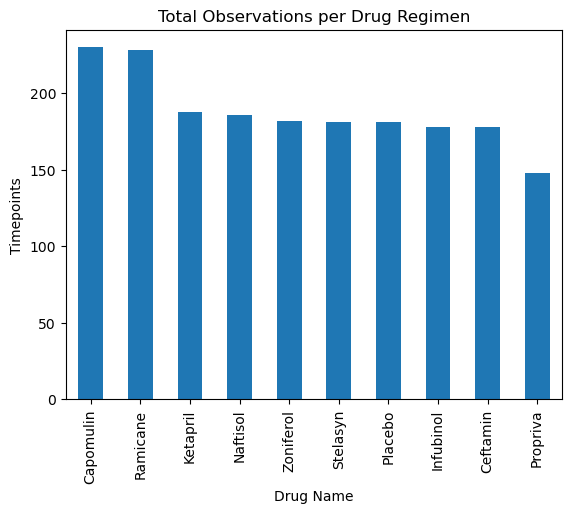

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_reg = combined_data["Drug Regimen"].value_counts()
drug_reg.plot(kind = "bar", title="Total Observations per Drug Regimen", xlabel="Drug Name", ylabel="Timepoints")
plt.show()

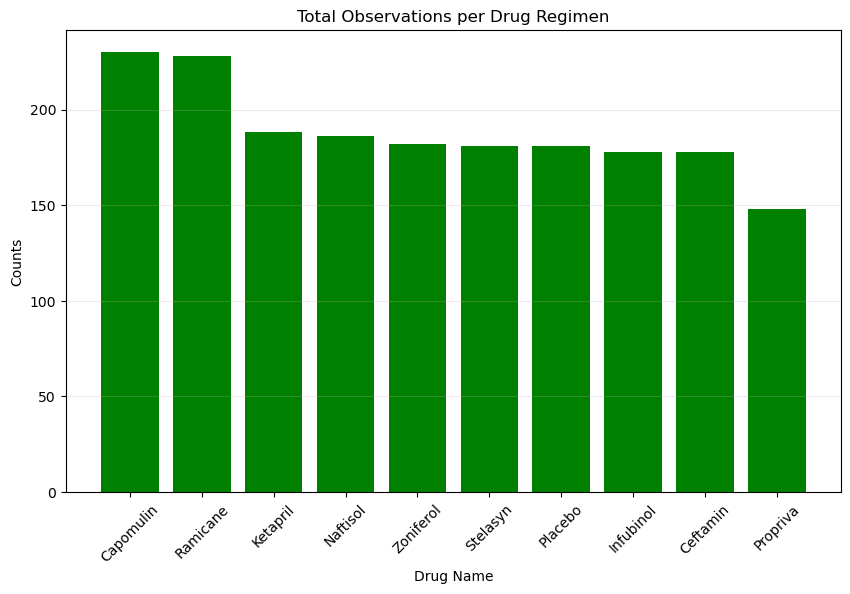

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig = plt.figure(figsize = (10, 6))
plt.bar(drug_reg.index.values, drug_reg.values, color="green")

plt.title("Total Observations per Drug Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.25)

plt.show()

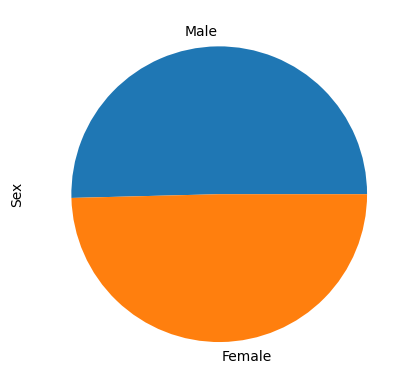

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_metadata.loc[mouse_metadata['Mouse ID'] != 'g989']
gender_num = gender.Sex.value_counts()
gender_num.plot(kind="pie", subplots=True)
plt.show()

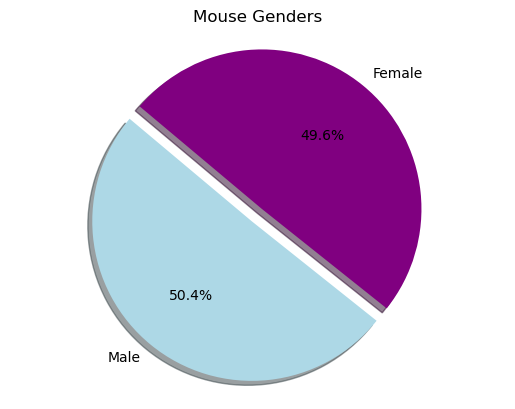

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue", "purple"]
explode = (0.1, 0)

plt.pie(gender_num, explode=explode, labels=("Male", "Female"), colors=colors, 
        autopct = "%1.1f%%", shadow=True, startangle=140)

plt.title("Mouse Genders")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timesdf = combined_data.groupby(["Mouse ID"]).Timepoint.max().reset_index()
tumor_time = pd.merge(combined_data, timesdf, on=["Mouse ID", "Timepoint"], how="inner")
tumor_time
mask = tumor_time["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
tumordf = tumor_time.loc[mask].reset_index(drop=True)
tumordf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_data = []
for drug in drugs:
    sub = tumordf.loc[tumordf["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    lowerq = sub.quantile(0.25)
    upperq = sub.quantile(0.75)
    iqr = lowerq - upperq
    
    low_bound = lowerq - (1.5* iqr)
    up_bound = upperq + (1.5* iqr)
    
    mask = (tumordf["Drug Regimen"] == drug) & ((tumordf["Tumor Volume (mm3)"] > up_bound) | (tumordf["Tumor Volume (mm3)"] < low_bound))
    outliers = tumordf.loc[mask]
    print(outliers)
    
    drug_data.append(sub)

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
11     w150         10           39.952347                 0    Capomulin   
14     r157         15           46.539206                 0    Capomulin   
16     f966         20           30.485985                 0    Capomulin   
33     j246         35           38.753265                 1    Capomulin   
38     b128         45           38.982878                 2    Capomulin   
42     t565         45           34.455298                 0    Capomulin   
43     l509         45           41.483008                 3    Capomulin   
47     g288         45           37.074024                 1    Capomulin   
53     r554         45           32.377357                 3    Capomulin   
56     g316         45           40.159220                 2    Capomulin   
59     y793         45           31.896238                 2    Capomulin   
61     m957         45           33.329098                 1    Capomulin   

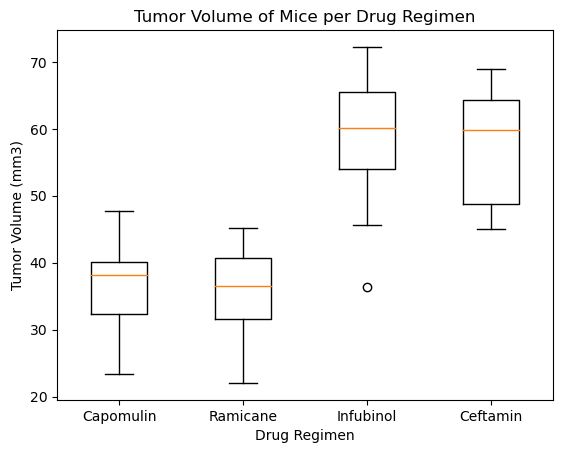

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_data, labels=drugs)
plt.title("Tumor Volume of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

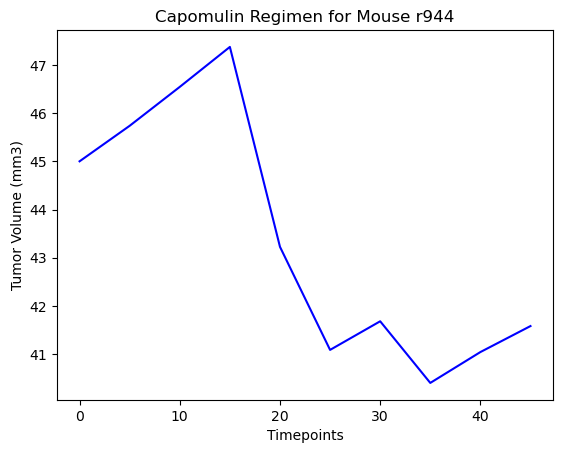

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capdf = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
mousecapdf = combined_data.loc[combined_data["Mouse ID"] == "r944"]

plt.plot(mousecapdf["Timepoint"], mousecapdf["Tumor Volume (mm3)"], color="blue")
plt.title("Capomulin Regimen for Mouse r944")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

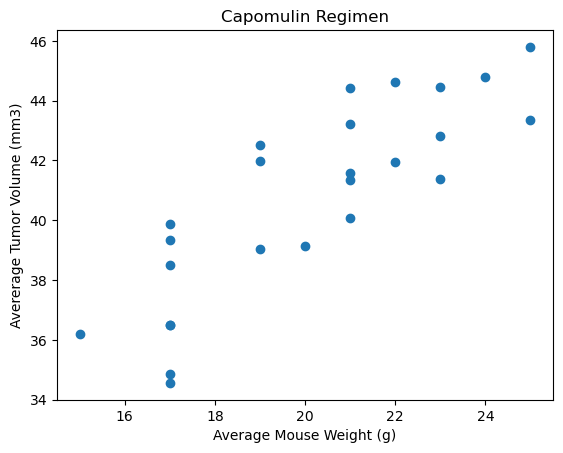

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mask2 = combined_data["Drug Regimen"] == "Capomulin"
mouse_tumdf = combined_data.loc[mask2].groupby(combined_data["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()

plt.scatter(mouse_tumdf["Weight (g)"], mouse_tumdf["Tumor Volume (mm3)"])

plt.title("Capomulin Regimen")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Avererage Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


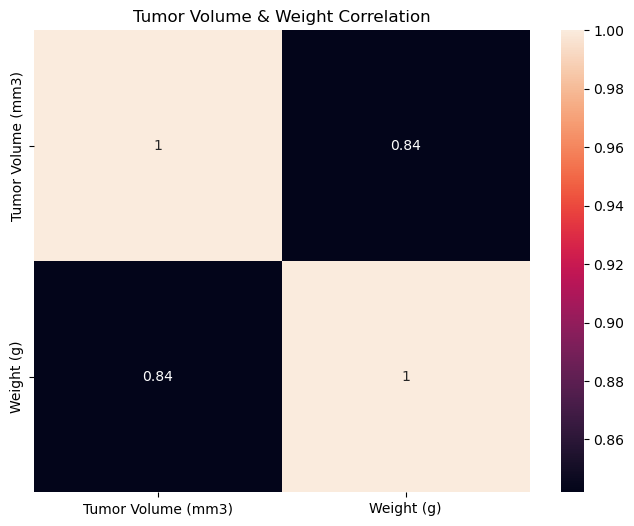

In [21]:
mouse_tumdf.corr()
corrs = mouse_tumdf.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrs, annot=True)
plt.title("Tumor Volume & Weight Correlation")
plt.show()

The r-squared is: 0.7088568047708723


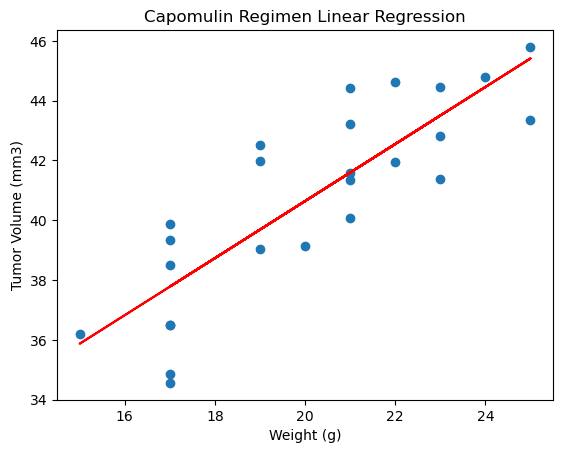

In [22]:
x_values = mouse_tumdf["Weight (g)"]
y_values = mouse_tumdf["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150,40),fontsize=15,color="red")
plt.title("Capomulin Regimen Linear Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()